In [1]:
from train import train, preprocess_generate_expression_dataset, decode_prediction, run_inference, infer_single_image, NUM_CLASSES

In [2]:
from mathsolver import MathSolverModel

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# train_loader, test_loader, val_loader = preprocess_generate_expression_dataset(num_samples=20000, batch_size=64)

In [6]:
# epoch_vs_loss = train(train_loader=train_loader, val_loader=val_loader, num_epochs=20, device=device, step_size=5, patience=5)

In [7]:
metrics_folder = "results"

In [8]:
# save epoch vs loss to metrics_folder
# with open(f"{metrics_folder}/checkpoint_three/epoch_vs_loss.txt", "w") as f:
#     for epoch, loss in epoch_vs_loss.items():
#         f.write(f"Epoch {epoch + 1}: {loss}\n")

In [9]:
# plt.plot(epoch_vs_loss.keys(), epoch_vs_loss.values(), label='Train Loss')
# plt.title('Train Loss vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Train Loss')
# plt.legend()
# plt.show()

In [10]:
model = MathSolverModel(num_classes=NUM_CLASSES).to(device)
model.load_state_dict(torch.load("results/checkpoint_two/math_solver.pth"))

<All keys matched successfully>

In [ ]:
# for name, param in model.named_parameters():
#     # if param.requires_grad:
#         print(name, param.shape)

cnn.0.weight torch.Size([64, 1, 3, 3])
cnn.0.bias torch.Size([64])
cnn.3.weight torch.Size([128, 64, 3, 3])
cnn.3.bias torch.Size([128])
rnn.weight_ih_l0 torch.Size([1024, 1024])
rnn.weight_hh_l0 torch.Size([1024, 256])
rnn.bias_ih_l0 torch.Size([1024])
rnn.bias_hh_l0 torch.Size([1024])
rnn.weight_ih_l0_reverse torch.Size([1024, 1024])
rnn.weight_hh_l0_reverse torch.Size([1024, 256])
rnn.bias_ih_l0_reverse torch.Size([1024])
rnn.bias_hh_l0_reverse torch.Size([1024])
rnn.weight_ih_l1 torch.Size([1024, 512])
rnn.weight_hh_l1 torch.Size([1024, 256])
rnn.bias_ih_l1 torch.Size([1024])
rnn.bias_hh_l1 torch.Size([1024])
rnn.weight_ih_l1_reverse torch.Size([1024, 512])
rnn.weight_hh_l1_reverse torch.Size([1024, 256])
rnn.bias_ih_l1_reverse torch.Size([1024])
rnn.bias_hh_l1_reverse torch.Size([1024])
fc.weight torch.Size([15, 512])
fc.bias torch.Size([15])


In [26]:
sample_tensor = torch.randn(1, 1, 32, 32).to(device)  # Example input tensor
x = sample_tensor
for name, layer in model.cnn.named_children():
    x = layer(x)
    print(f"Block: {name}, Output shape: {x.shape}")

Block: 0, Output shape: torch.Size([1, 64, 32, 32])
Block: 1, Output shape: torch.Size([1, 64, 32, 32])
Block: 2, Output shape: torch.Size([1, 64, 16, 16])
Block: 3, Output shape: torch.Size([1, 128, 16, 16])
Block: 4, Output shape: torch.Size([1, 128, 16, 16])
Block: 5, Output shape: torch.Size([1, 128, 8, 8])


In [27]:
b, c, h, w = x.size()
x = x.permute(0, 3, 1, 2).contiguous()  # (B, W, C, H)
x = x.view(b, w, c * h)  # (B, W, C*H)
print(x.shape)
for name, layer in model.rnn.named_children():
    x = layer(x)
    print(f"Block: {name}, Output shape: {x.shape}")

torch.Size([1, 8, 1024])


In [14]:
# from PIL import Image
# import os

# # Create a folder to save the images
# output_folder = "results/checkpoint_three/test_images"
# os.makedirs(output_folder, exist_ok=True)

# # Save images from test_loader
# for idx, (imgs, labels, input_lengths, label_lengths) in enumerate(test_loader):
#     for i, image in enumerate(imgs):
#         # Convert the tensor to a PIL image
#         pil_image = Image.fromarray((image.squeeze().numpy() * 255).astype('uint8'))
#         # Save the image
#         pil_image.save(os.path.join(output_folder, f"image_{idx * len(imgs) + i}.png"))

In [15]:
# torch.save(test_loader, f"results/checkpoint_three/test_loader.pth")

In [16]:
from torch.utils.data import DataLoader
torch.serialization.add_safe_globals([DataLoader])
test_loader_data = torch.load("results/checkpoint_two/test_loader.pth", weights_only=False)

In [17]:
# # load test_loader
# run_inference(model, test_loader_data, device)

<_io.BufferedReader name='predictions\\image.png'>


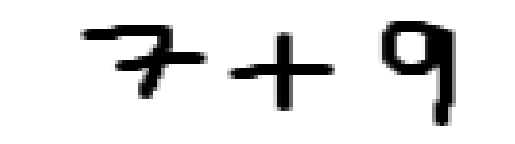

Predicted Expression: ['7+9']
<_io.BufferedReader name='predictions\\image_1.png'>


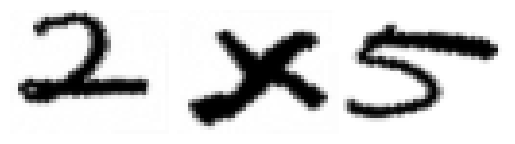

Predicted Expression: ['2*5']
<_io.BufferedReader name='predictions\\image_2.png'>


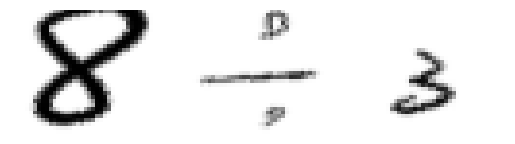

Predicted Expression: ['83']
<_io.BufferedReader name='predictions\\image_3.png'>


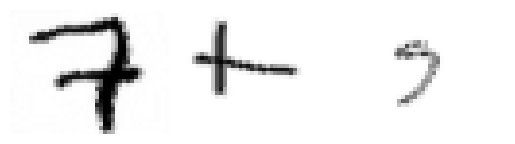

Predicted Expression: ['7+7']
<_io.BufferedReader name='predictions\\image_4.png'>


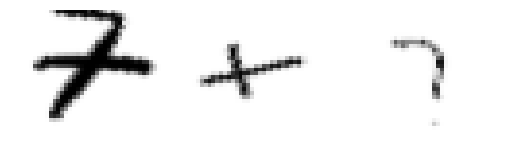

Predicted Expression: ['7+7']
<_io.BufferedReader name='predictions\\image_5.png'>


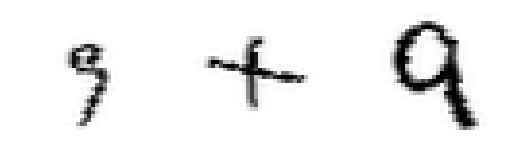

Predicted Expression: ['9+9']
<_io.BufferedReader name='predictions\\image_6.png'>


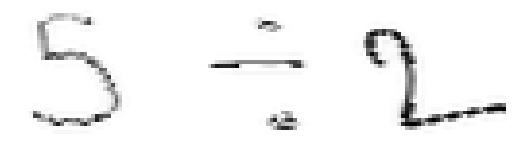

Predicted Expression: ['52']
<_io.BufferedReader name='predictions\\image_7.png'>


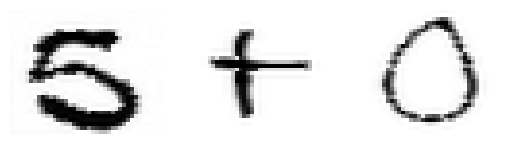

Predicted Expression: ['5+0']
<_io.BufferedReader name='predictions\\image_8.png'>


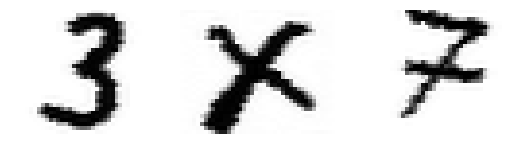

Predicted Expression: ['3*7']


In [18]:
import os
for filename in os.listdir("predictions"):
    with open(os.path.join("predictions", filename), "rb") as f:
        print(f)
        infer_single_image(f, model, device)

In [22]:
def evaluate(expression):
    result = eval(expression)
    print(f"Expression: {expression} = {result}")

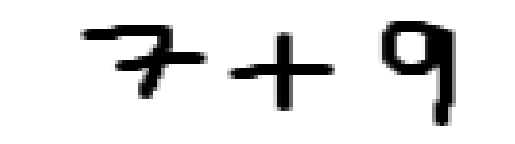

Predicted Expression: ['7+9']
Expression: 7+9 = 16


In [23]:
evaluate(infer_single_image('predictions/image.png', model, device))